In [49]:
using Statistics
using Plots, Plots.PlotMeasures, Measurements
using CSV
using DataFrames
using LaTeXStrings
using Formatting
using ColorSchemes

include("analysis.jl")
include("utils.jl")

dir = pwd()
outputFile = "julia_notebook_ressource_tmp.csv"

"julia_notebook_ressource_tmp.csv"

In [45]:
function fast_tanh(x)
    if (x < -4.971786858528029)
        return -1;
    end
    if (x > 4.971786858528029)
        return 1;
    end
    x2 = x * x;
    a = x * (135135.0 + x2 * (17325.0 + x2 * (378.0 + x2)));
    b = 135135.0 + x2 * (62370.0 + x2 * (3150.0 + x2 * 28.0));
    return a / b;
end

function three_lin_tanh(x)
    if (x < -1.299725497278728)
        return -1;
    end
    if (x > 1.299725497278728)
        return 1;
    end
    return x * 0.769393231181298;
end

function five_lin_tanh(x)
    if (x < -0.818631533308157)
        if (x < -1.979238406276971)
            return -1;
        end
        return x * 0.235809350838973 - 0.533277076260264;
    end
    if (x > 0.818631533308157)
        if (x > 1.979238406276971)
            return 1;
        end
        return x * 0.235809350838973 + 0.533277076260264;
    end
    return x * 0.887234387088490;
end

function seven_lin_tanh(x)
    if (x < -0.624132858395671) 
        if (x < -2.410509184849241) 
            return -1;
        else
            if (x < -1.301659605617803) 
                return x*0.103110372745653 - 0.751451499443375;
            else 
                return x*0.450656591171619 - 0.299064625833073;
            end
        end
    else 
        if (x < 1.301659605617803) 
            if (x < 0.624132858395671) 
                return x*0.929824803211947;
            else 
                return x*0.450656591171619 + 0.299064625833073;
            end
        else 
            if (x < 2.410509184849241) 
                return x*0.103110372745653 + 0.751451499443375;
            else 
                return 1;
            end
        end
    end
end


function fifteen_lin_tanh(x)
    if (x < -0.349846806360468)
        if (x > -1.288690112231558)
            if (x > -0.652273105339896)
                    return 0.784454209160348*x - 0.067136203627008;
            else
                if (x > -0.952698399354790)
                    return 0.558066602782327*x - 0.214802750649666;
                else
                    return 0.349394991344478*x - 0.413603860857289;
                end
            end
        else
            if (x > -2.289691672012657)
                if (x > -1.703950163909747)
                    return 0.184190996012522*x - 0.626500616142730;
                else
                    return 0.073287597472899*x - 0.815474480262468;
                end
            else
                if (x > -3.369261331568106)
                    return 0.015487206401210*x - 0.947819554338388;
                else
                    return -1;
                end
            end
        end
    else
        if (x < 1.288690112231558)
            if (x < 0.652273105339896)
                if (x < 0.349846806360468)
                    return 0.976355928445541*x;
                else
                    return 0.784454209160348*x + 0.067136203627008;
                end
            else
                if (x < 0.952698399354790)
                    return 0.558066602782327*x + 0.214802750649666;
                else 
                    return 0.349394991344478*x + 0.413603860857289;
                end
            end
        else
            if (x < 2.289691672012657)
                if (x < 1.703950163909747) 
                    return 0.184190996012522*x + 0.626500616142730;
                else
                    return 0.073287597472899*x + 0.815474480262468;
                end
            else
                if (x < 3.369261331568106)
                    return 0.015487206401210*x + 0.947819554338388;
                else
                    return 1;
                end
            end
        end
    end
end

fifteen_lin_tanh (generic function with 1 method)

In [3]:
x = LinRange(-5, 5, 10000);

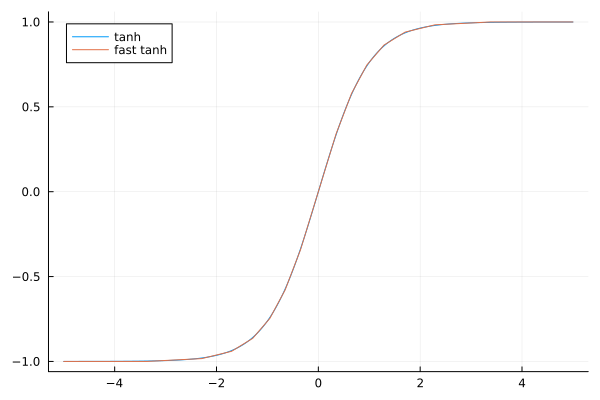

In [46]:
p1 = plot(x, tanh.(x), label="tanh")
p1 = plot!(x, fifteen_lin_tanh.(x), label="fast tanh")

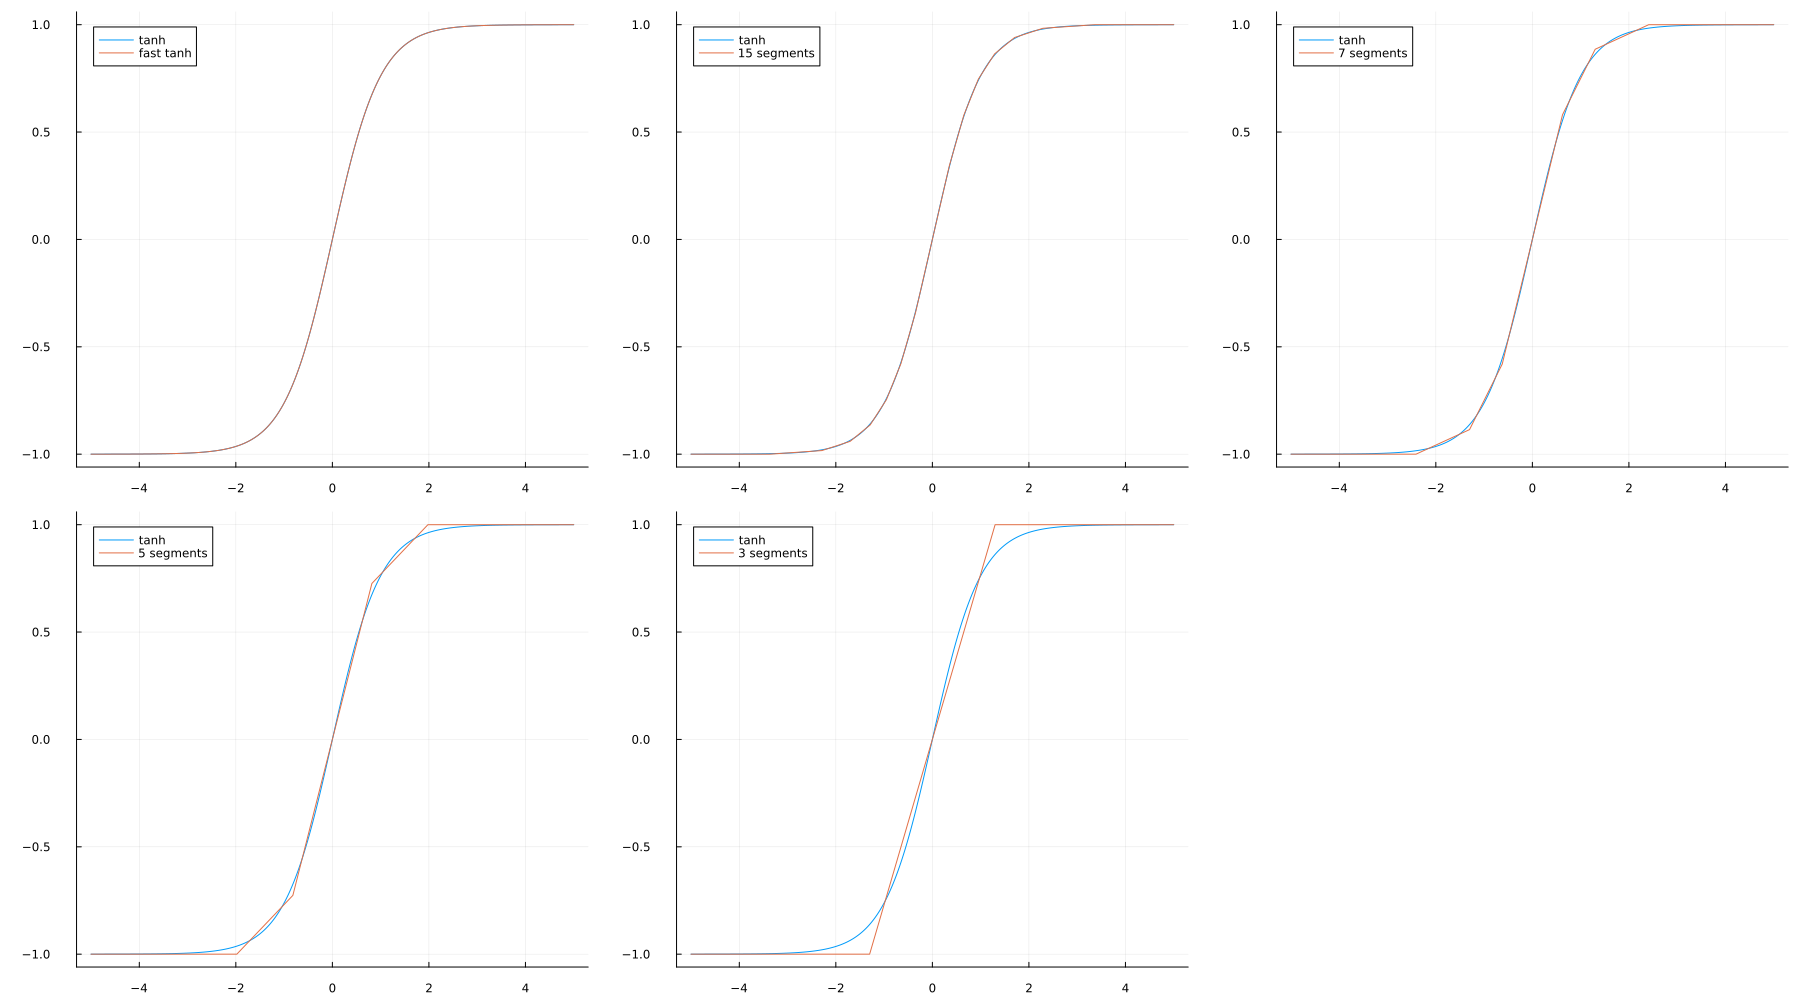

In [65]:
p1 = plot(x, tanh.(x), label="tanh")
p1 = plot!(x, fast_tanh.(x), label="fast tanh")

p2 = plot(x, tanh.(x), label="tanh")
p2 = plot!(x, fifteen_lin_tanh.(x), label="15 segments")


p3 = plot(x, tanh.(x), label="tanh")
p3 = plot!(x, seven_lin_tanh.(x), label="7 segments")

p4 = plot(x, tanh.(x), label="tanh")
p4 = plot!(x, five_lin_tanh.(x), label="5 segments")

p5 = plot(x, tanh.(x), label="tanh")
p5 = plot!(x, three_lin_tanh.(x), label="3 segments")


plot(p1, p2, p3, p4, p5, layout=grid(2, 3), size=(1800, 1000), leftmargin=20px)

In [66]:
savefig("tanh_approximations.png")

"c:\\Users\\chris\\OneDrive\\Documents\\Unif\\PhD\\Stay with Fulvio\\Vex Control Code\\C++\\Plot data from SDCard\\tanh_approximations.png"

In [54]:
mtanh = 8.3468;      stanh = 0.004859;
mtanhf = 3.5979;     stanhf = 0.004917;
mtanh15 = 2.0512;    stanh15 = 0.002619;
mtanh15f = 1.6797;   stanh15f = 0.004677;
mtanh15sf = 1.6893;  stanh15sf = 0.004630;
mtanh7 = 1.9722;     stanh7 = 0.002585;
mtanh5 = 1.8348;     stanh5 = 0.003783;
mtanh3 = 1.4189;     stanh3 = 0.004936;
mtanh0 = 0.9553;     stanh0 = 0.002114;

mrange = [mtanh, mtanhf, mtanh15, mtanh7, mtanh5, mtanh3, mtanh0];
srange = [stanh, stanhf, stanh15, stanh7, stanh5, stanh3, stanh0] .* sqrt(10000);

macc = [mtanh15, mtanh15f, mtanh15sf];
sacc = [stanh15, stanh15f, stanh15sf] .* sqrt(10000);

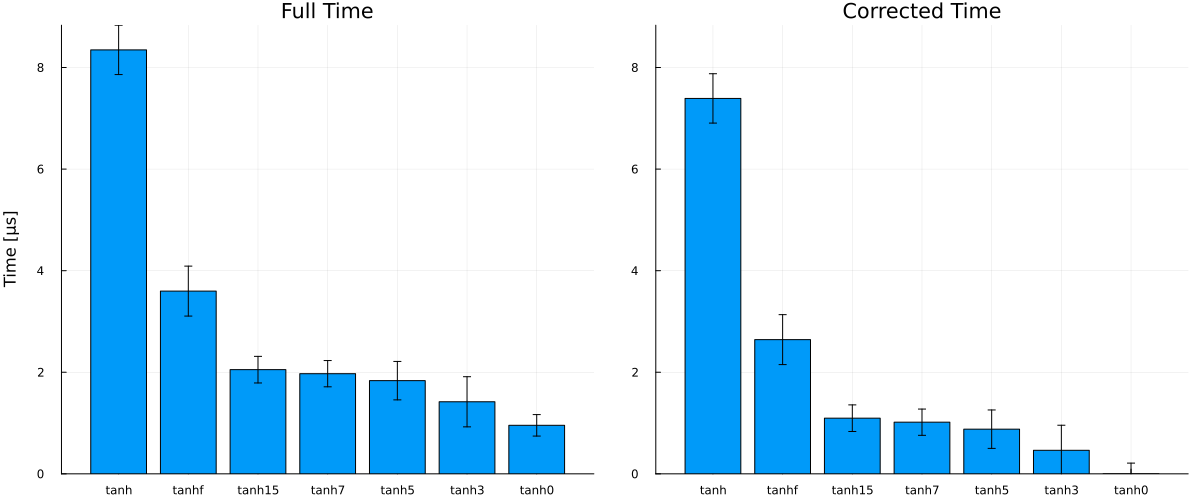

In [58]:
b1 = bar(["tanh", "tanhf", "tanh15", "tanh7", "tanh5", "tanh3", "tanh0"], mrange .± srange, title="Full Time", ylabel="Time [µs]", ylims=[0, mrange[1] + srange[1]], label="")
b2 = bar(["tanh", "tanhf", "tanh15", "tanh7", "tanh5", "tanh3", "tanh0"], mrange .- mrange[end] .± srange, title="Corrected Time", ylims=[0, mrange[1] + srange[1]], label="")
plot(b1, b2, layout=grid(1,2), size= (1200,500), leftmargin=20px)

In [59]:
savefig("time_tanh.png")

"c:\\Users\\chris\\OneDrive\\Documents\\Unif\\PhD\\Stay with Fulvio\\Vex Control Code\\C++\\Plot data from SDCard\\time_tanh.png"

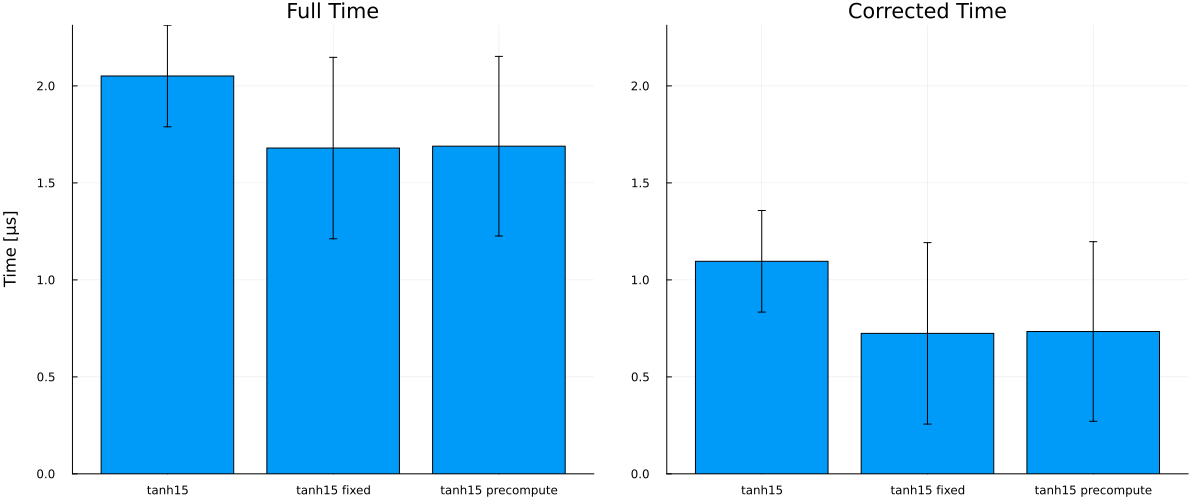

In [61]:
b1 = bar(["tanh15", "tanh15 fixed", "tanh15 precompute"], macc .± sacc, title="Full Time", ylabel="Time [µs]", ylims=[0, macc[1] + sacc[1]], label="")
b2 = bar(["tanh15", "tanh15 fixed", "tanh15 precompute"], macc .- mrange[end] .± sacc, title="Corrected Time", ylims=[0, macc[1] + sacc[1]], label="")
plot(b1, b2, layout=grid(1, 2), size=(1200, 500), leftmargin=20px)

In [62]:
savefig("time_tanh_fixed.png")

"c:\\Users\\chris\\OneDrive\\Documents\\Unif\\PhD\\Stay with Fulvio\\Vex Control Code\\C++\\Plot data from SDCard\\time_tanh_fixed.png"

In [2]:
short_data = grid_from_directory("data/chart_thesis_model/short", 15.0)
mid_data = grid_from_directory("data/chart_thesis_model/mid", 15.0)
long_data = grid_from_directory("data/chart_thesis_model/long", 15.0)

Multiple line cross in oscillation analysis
Multiple line cross in oscillation analysis


([([0.08730373672617649, 0.18729159255144942], [2.3791116035957978, 1.9321048118206154], [0.2866468565005375, 0.3531615825101761], [0.06821505242051173], [0.20396341883181598]) ([0.10821446742896416, 0.11419370128444835], [2.7375636006716837, 2.5007208773636265], [0.45253746116059196, 0.502826384810854], [0.0686696180680562], [0.17532270360081856]); ([0.08071644661778003, 0.15216586440937452], [2.2383631103419903, 2.2437986778473604], [0.3005304165189964, 0.4454756487724891], [0.08133329209351103], [0.22318313394187986]) ([0.08530553387656283, 0.1299937182685636], [2.5648405636352076, 2.5633447793311053], [0.22921176211615713, 0.3443090511152763], [0.06985605906429912], [0.1950572852496762]); … ; ([0.5134055175994463, 0.6045695656272783], [0.4149756749664079, 0.4126408881473223], [0.2149265288802531, 0.25076845272968223], [2.259277383493365], [1.2009894009449484]) ([0.5476865985217162, 0.47075314537932206], [0.5969094158430296, 0.596511378701839], [0.09696922601505596, 0.28698433240278

In [24]:
results, keys_val, parameters_grid = short_data
end_name = "short"

"short"

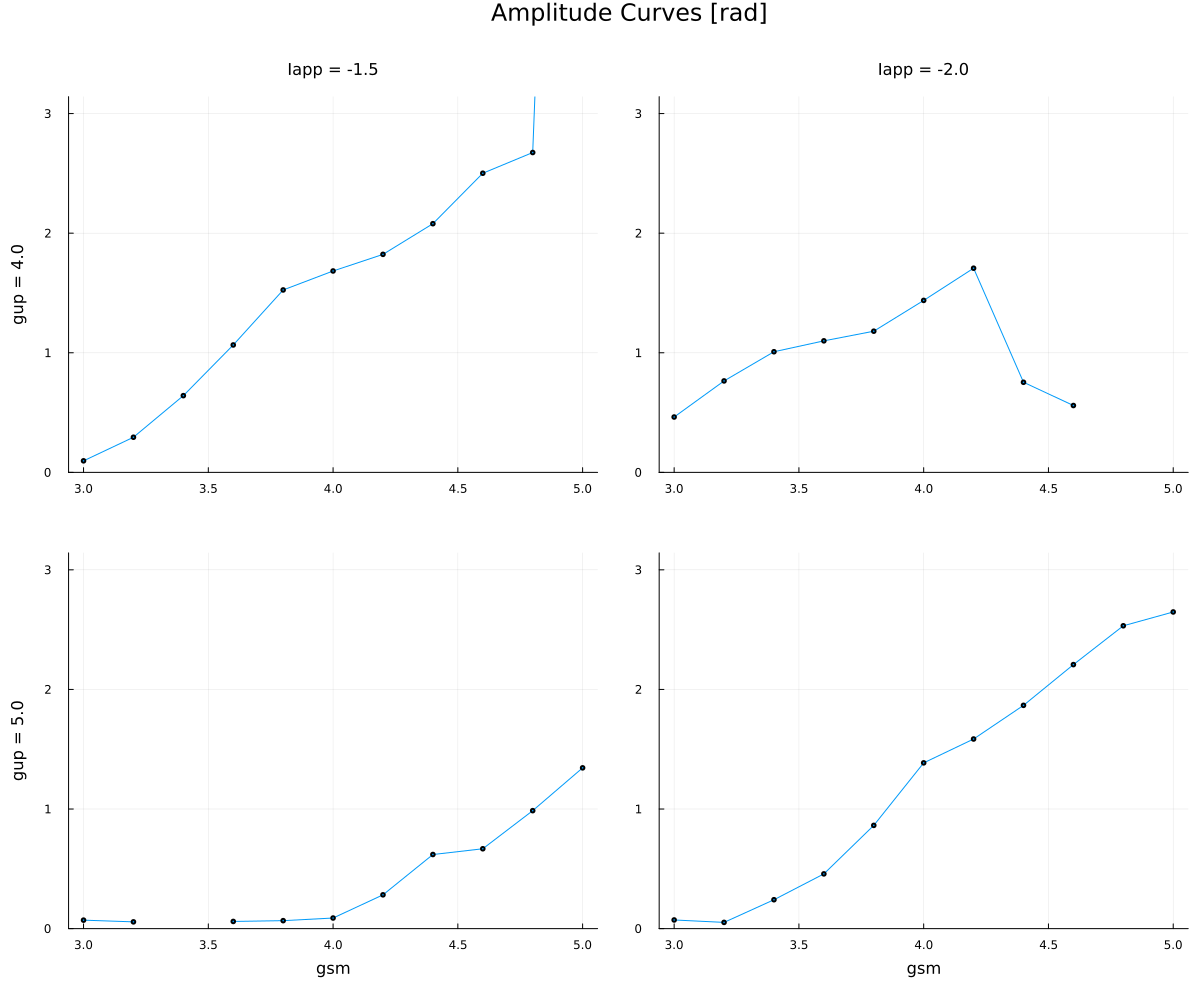

In [25]:
p1 = plot_from_grid(results, keys_val, parameters_grid, 4, 1, [1, 1])
plot!(legend=false, ylims=(0, pi), ylabel=string(keys_val[2], " = ", parameters_grid[2][1]), guide_position=:top, xlabel=string(keys_val[3], " = ", -parameters_grid[3][1]))
p2 = plot_from_grid(results, keys_val, parameters_grid, 4, 1, [1, 2])
plot!(legend=false, ylims=(0, pi), guide_position=:top, xlabel=string(keys_val[3], " = ", -parameters_grid[3][2]))
p3 = plot_from_grid(results, keys_val, parameters_grid, 4, 1, [2, 1])
plot!(legend=false, ylims=(0, pi), ylabel=string(keys_val[2], " = ", parameters_grid[2][2]), xlabel=keys_val[1])
p4 = plot_from_grid(results, keys_val, parameters_grid, 4, 1, [2, 2])
plot!(legend=false, ylims=(0, pi), xlabel=keys_val[1])

l = @layout [
    Plots.grid(2, 2)
]

plot(p1, p2, p3, p4, layout=l, size=(1200, 1000), bottommargin=20px, leftmargin=20px, topmargin=20px, plot_title="Amplitude Curves [rad]")

In [26]:
savefig(string("amp_", end_name,".png"))

"c:\\Users\\chris\\OneDrive\\Documents\\Unif\\PhD\\Stay with Fulvio\\Vex Control Code\\C++\\Plot data from SDCard\\amp_short.png"

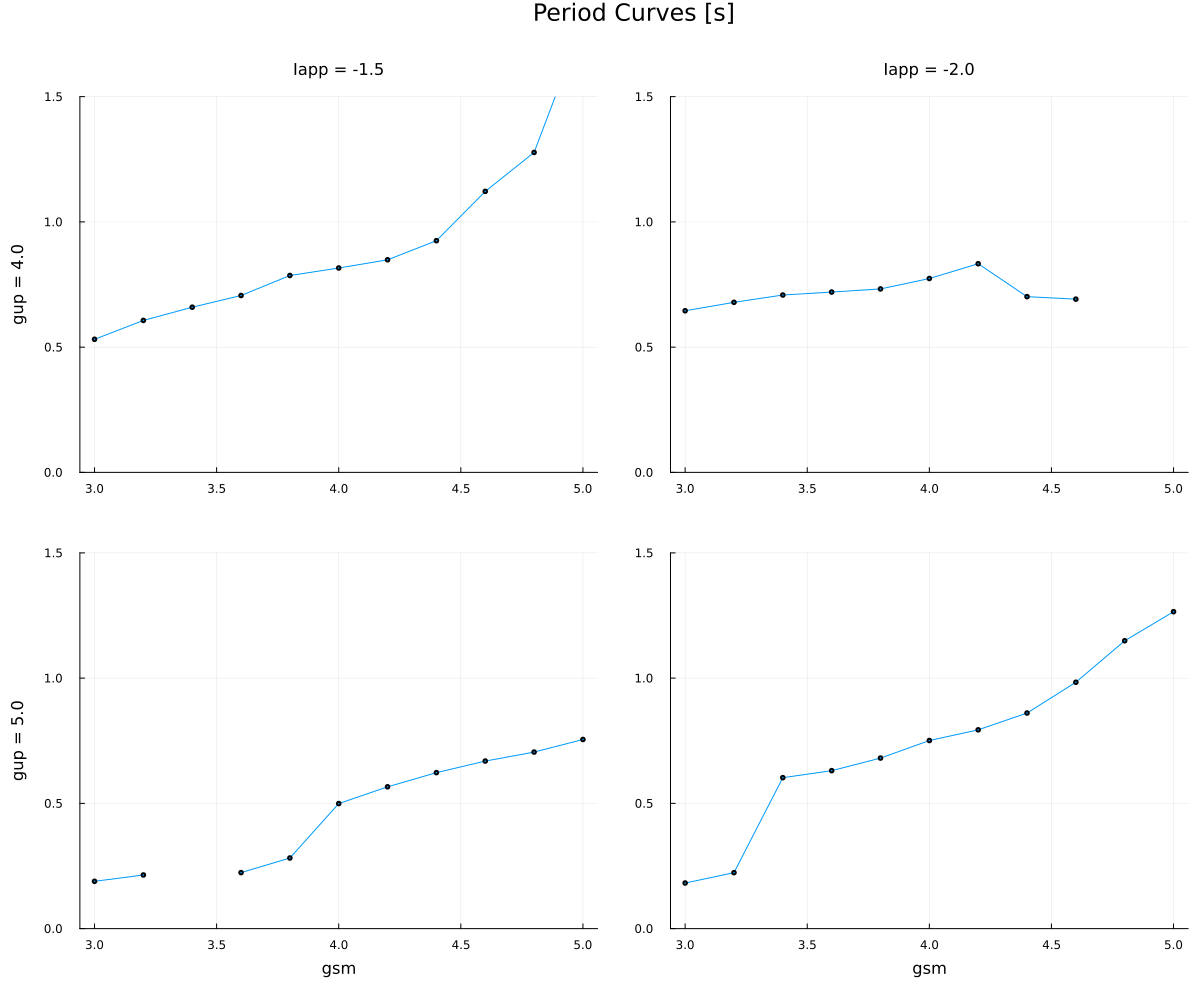

In [27]:
p1 = plot_from_grid(results, keys_val, parameters_grid, 5, 1, [1, 1])
plot!(legend=false, ylims=(0, 1.5), ylabel=string(keys_val[2], " = ", parameters_grid[2][1]), guide_position=:top, xlabel=string(keys_val[3], " = ", -parameters_grid[3][1]))
p2 = plot_from_grid(results, keys_val, parameters_grid, 5, 1, [1, 2])
plot!(legend=false, ylims=(0, 1.5), guide_position=:top, xlabel=string(keys_val[3], " = ", -parameters_grid[3][2]))
p3 = plot_from_grid(results, keys_val, parameters_grid, 5, 1, [2, 1])
plot!(legend=false, ylims=(0, 1.5), ylabel=string(keys_val[2], " = ", parameters_grid[2][2]), xlabel=keys_val[1])
p4 = plot_from_grid(results, keys_val, parameters_grid, 5, 1, [2, 2])
plot!(legend=false, ylims=(0, 1.5), xlabel=keys_val[1])

l = @layout [
    Plots.grid(2, 2)
]

plot(p1, p2, p3, p4, layout=l, size=(1200, 1000), bottommargin=20px, leftmargin=20px, topmargin=20px, plot_title="Period Curves [s]")

In [28]:
savefig(string("period_", end_name, ".png"))

"c:\\Users\\chris\\OneDrive\\Documents\\Unif\\PhD\\Stay with Fulvio\\Vex Control Code\\C++\\Plot data from SDCard\\period_short.png"

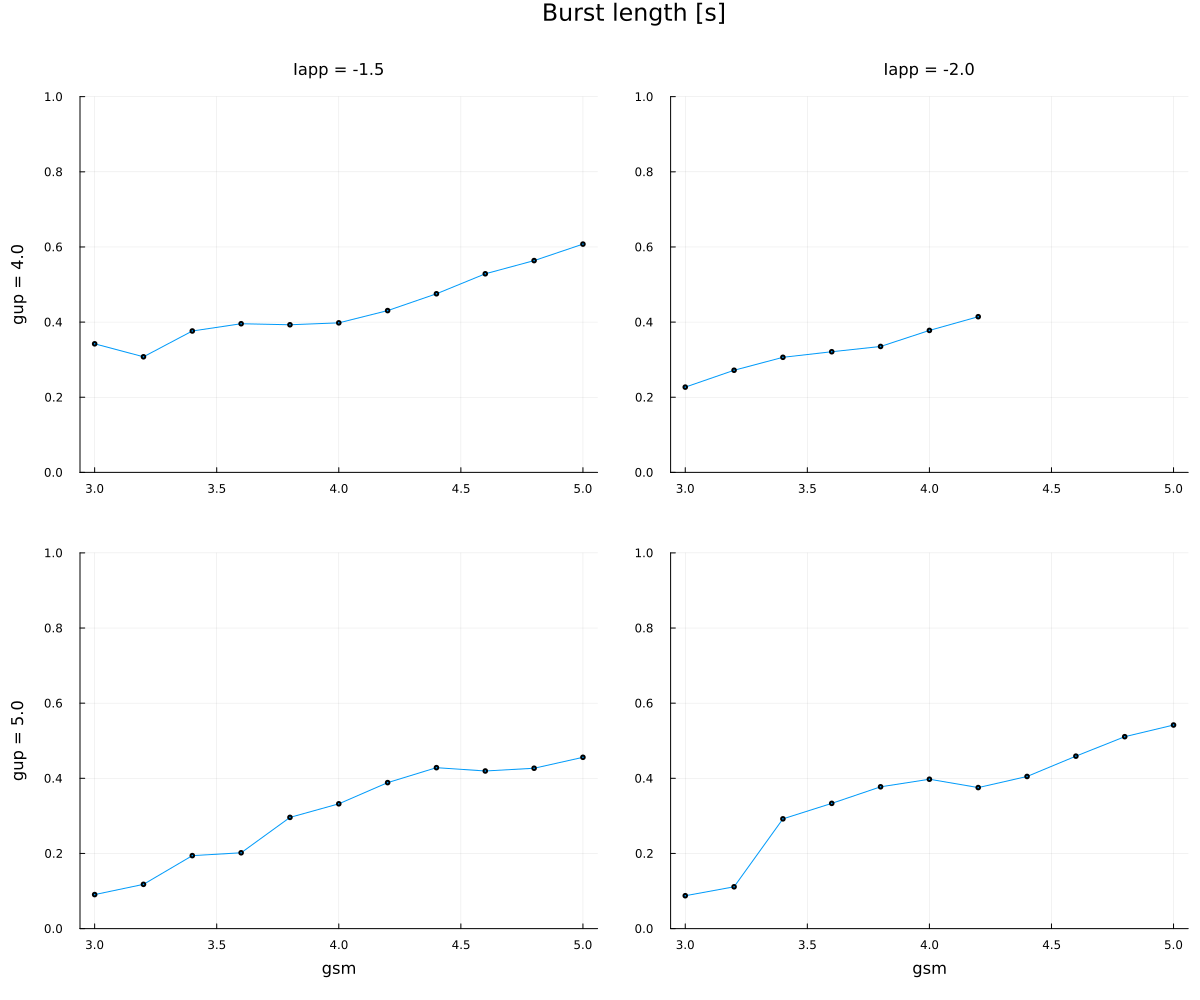

In [29]:
p1 = plot_from_grid(results, keys_val, parameters_grid, 1, 1, [1, 1])
plot!(legend=false, ylims=(0, 1), ylabel=string(keys_val[2], " = ", parameters_grid[2][1]), guide_position=:top, xlabel=string(keys_val[3], " = ", -parameters_grid[3][1]))
p2 = plot_from_grid(results, keys_val, parameters_grid, 1, 1, [1, 2])
plot!(legend=false, ylims=(0, 1), guide_position=:top, xlabel=string(keys_val[3], " = ", -parameters_grid[3][2]))
p3 = plot_from_grid(results, keys_val, parameters_grid, 1, 1, [2, 1])
plot!(legend=false, ylims=(0, 1), ylabel=string(keys_val[2], " = ", parameters_grid[2][2]), xlabel=keys_val[1])
p4 = plot_from_grid(results, keys_val, parameters_grid, 1, 1, [2, 2])
plot!(legend=false, ylims=(0, 1), xlabel=keys_val[1])

l = @layout [
    Plots.grid(2, 2)
]

plot(p1, p2, p3, p4, layout=l, size=(1200, 1000), bottommargin=20px, leftmargin=20px, topmargin=20px, plot_title="Burst length [s]")

In [30]:
savefig(string("blen_", end_name, ".png"))

"c:\\Users\\chris\\OneDrive\\Documents\\Unif\\PhD\\Stay with Fulvio\\Vex Control Code\\C++\\Plot data from SDCard\\blen_short.png"

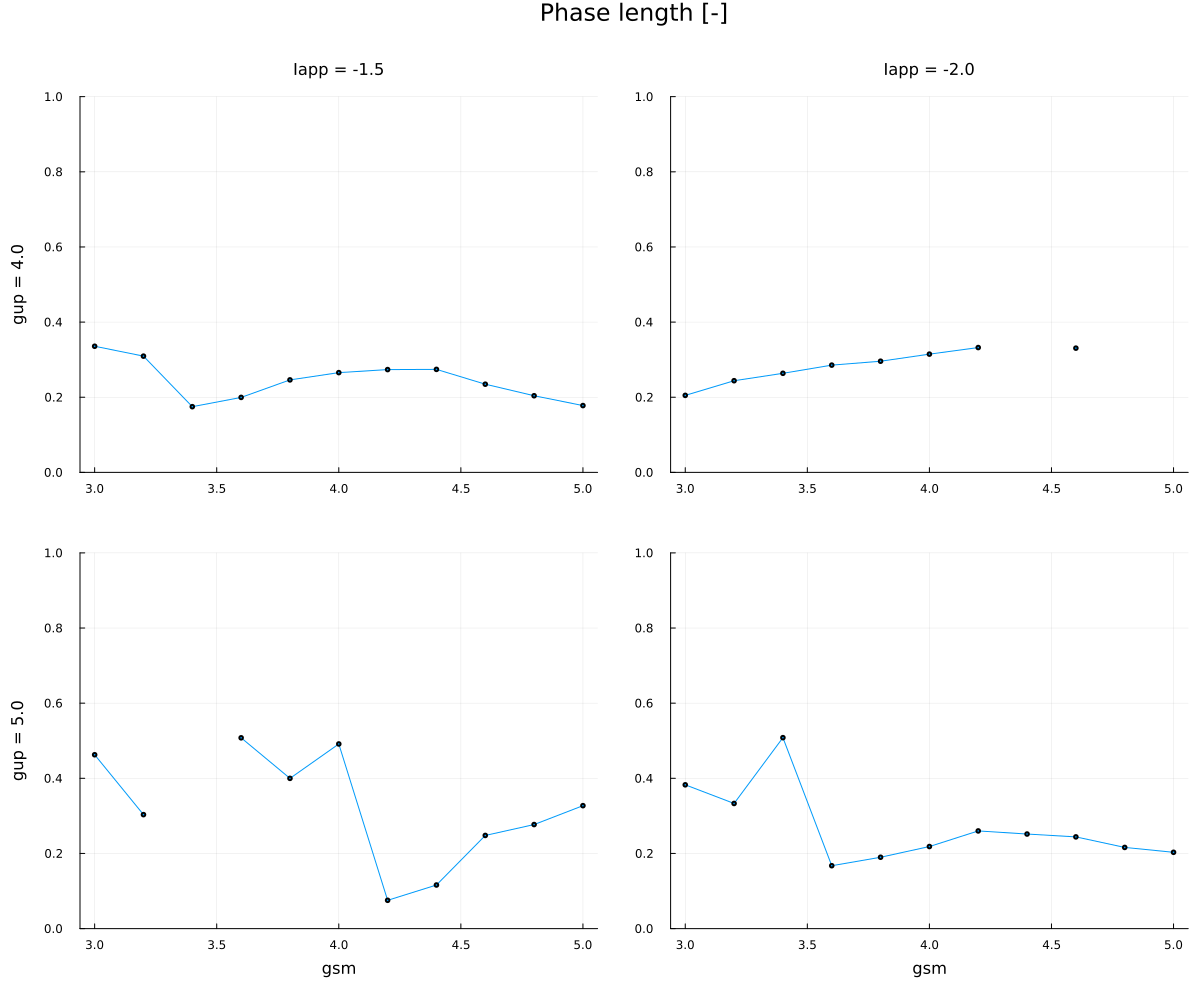

In [31]:
p1 = plot_from_grid(results, keys_val, parameters_grid, 3, 1, [1, 1])
plot!(legend=false, ylims=(0, 1), ylabel=string(keys_val[2], " = ", parameters_grid[2][1]), guide_position=:top, xlabel=string(keys_val[3], " = ", -parameters_grid[3][1]))
p2 = plot_from_grid(results, keys_val, parameters_grid, 3, 1, [1, 2])
plot!(legend=false, ylims=(0, 1), guide_position=:top, xlabel=string(keys_val[3], " = ", -parameters_grid[3][2]))
p3 = plot_from_grid(results, keys_val, parameters_grid, 3, 1, [2, 1])
plot!(legend=false, ylims=(0, 1), ylabel=string(keys_val[2], " = ", parameters_grid[2][2]), xlabel=keys_val[1])
p4 = plot_from_grid(results, keys_val, parameters_grid, 3, 1, [2, 2])
plot!(legend=false, ylims=(0, 1), xlabel=keys_val[1])

l = @layout [
    Plots.grid(2, 2)
]

plot(p1, p2, p3, p4, layout=l, size=(1200, 1000), bottommargin=20px, leftmargin=20px, topmargin=20px, plot_title="Phase length [-]")

In [32]:
savefig(string("phase_", end_name, ".png"))

"c:\\Users\\chris\\OneDrive\\Documents\\Unif\\PhD\\Stay with Fulvio\\Vex Control Code\\C++\\Plot data from SDCard\\phase_short.png"

In [49]:
#base_name = "data/drum/gsm_4__gup_4__Iapp_1d5__L_drum"
#base_name = "data/old/speed_sense_comp"
#base_name = "data/chart_thesis_model/mid/gsm_4d4__gup_4__Iapp_1d5__L_mid"
#base_name = "data/freeswing/long_high_amp"
#base_name = "data/freeswing/pos_hit_drum"
#base_name = "data/drum_hit/test_I_1d5m__sm_4m__up_5p"
#base_name = "data/module_test/differentiator"
base_name = "data/module_test/wta"

"data/module_test/wta"

In [15]:
mat_sen = creadToArray(string(base_name, "_sensors.bin"))

p_time_sen = mat_sen[1, :];
p_angle = mat_sen[2, :];
p_speed = mat_sen[3, :];
p_torque = mat_sen[4, :];
p_voltage = mat_sen[5, :];
p_current = mat_sen[6, :];
p_power = mat_sen[7, :];
p_volt_sent = mat_sen[8, :];

In [108]:
CSV.write(string(base_name, "_angle.csv"), DataFrame(transpose(mat_sen[1:2, :]), ["Time", "Angle"]), header=["Time", "Angle"])

"data/freeswing/pos_hit_drum_angle.csv"

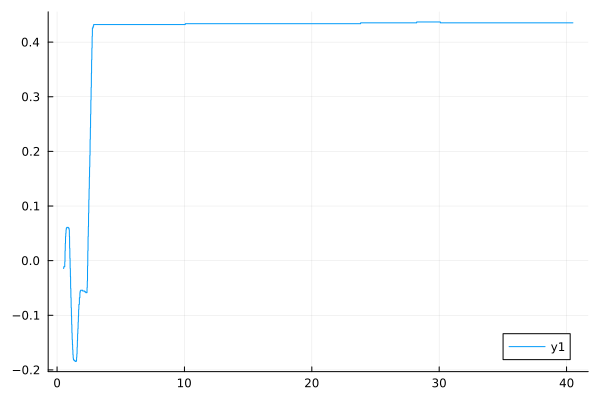

In [109]:
plot(p_time_sen, p_angle)

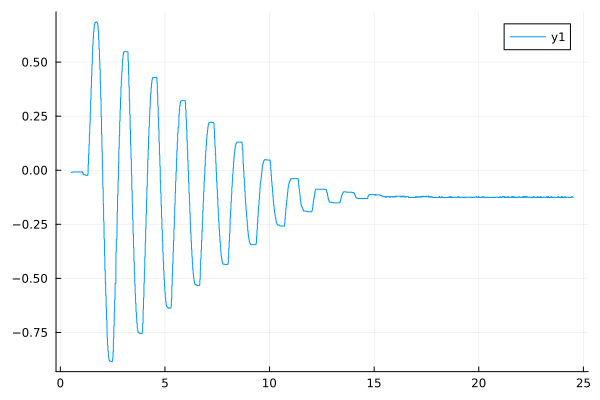

In [35]:
plot(p_time_sen, p_angle)

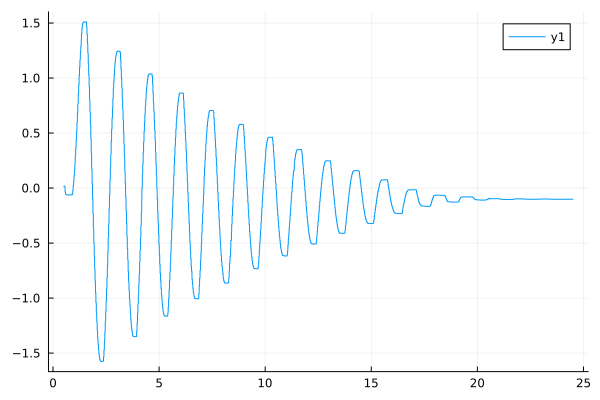

In [38]:
plot(p_time_sen, p_angle)

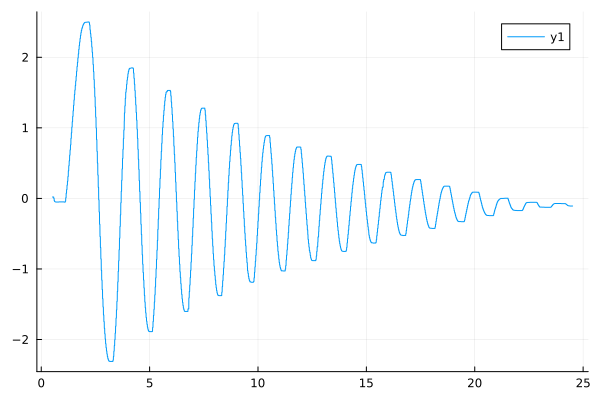

In [41]:
plot(p_time_sen, p_angle)

In [ ]:
l = @layout [
    Plots.grid(3,3)
]

p1 = plot(p_time_sen, p_angle, ylabel="angle", legend=false)
p2 = plot(p_time_sen, p_speed, ylabel="speed", legend=false)
p3 = plot(p_time_sen, p_torque, ylabel="torque", legend=false)
p4 = plot(p_time_sen, p_voltage, ylabel="voltage", legend=false)
p5 = plot(p_time_sen, p_current, ylabel="current", legend=false)
p6 = plot(p_time_sen, p_power, ylabel="power", legend=false)
p7 = plot(p_time_sen, p_volt_sent./1000, ylabel="voltage sent", legend=false)

plot(p1, p2, p3, p4, p5, p6, p7, layout=l, size=(1800, 1000), bottommargin=20px, leftmargin=20px)

In [42]:
# Differentiator
mat_sys = creadToArray(string(base_name, "_system.bin"))

p_time_sys = mat_sys[1, :];
error_in = mat_sys[2, :];
neuron1 = mat_sys[3, :];
neuron2 = mat_sys[4, :];
angle_in = mat_sys[5, :];
syn1 = mat_sys[6, :];
syn2 = mat_sys[7, :];

In [50]:
# WTA
mat_sys = creadToArray(string(base_name, "_system.bin"))

p_time_sys = mat_sys[1, :];
out1 = mat_sys[2, :];
out2 = mat_sys[3, :];
in1 = mat_sys[4, :];
in2 = mat_sys[5, :];


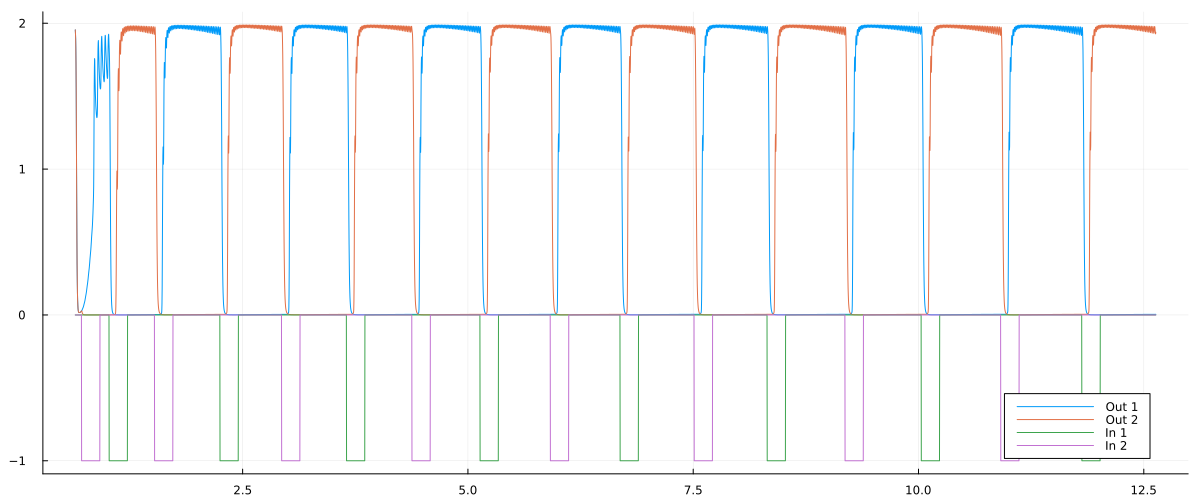

In [58]:
plot(p_time_sys, out1, label="Out 1")
plot!(p_time_sys, out2, label="Out 2")
plot!(p_time_sys, in1./10, label="In 1")
plot!(p_time_sys, in2./10, size=(1200,500), label="In 2")

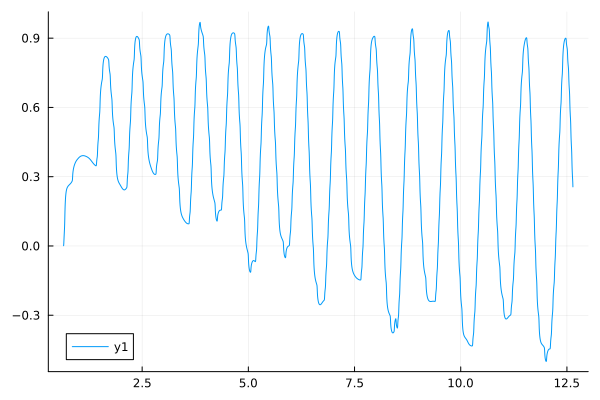

In [43]:
plot(p_time_sys, syn2 .- syn1)

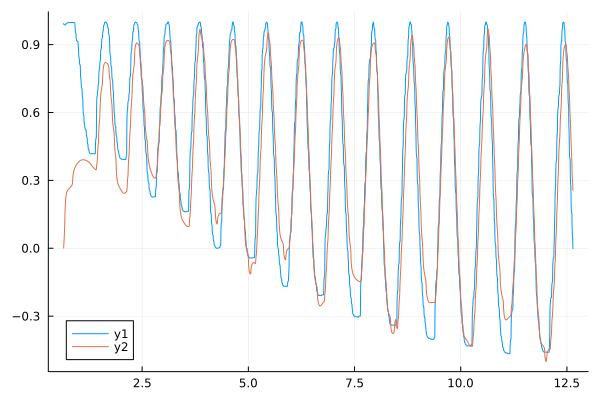

In [48]:
plot(p_time_sys, cos.(angle_in.+0.1))
plot!(p_time_sys, syn2 .- syn1)

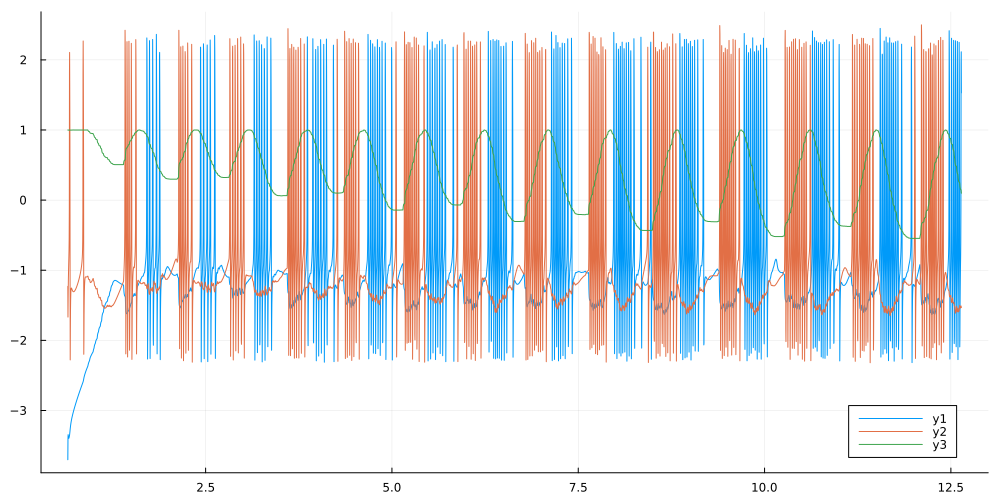

In [45]:
plot(p_time_sys, neuron1)
plot!(p_time_sys, neuron2)
plot!(p_time_sys, cos.(angle_in), size=(1000,500))

In [59]:
(1/2)^40

9.094947017729282e-13

In [ ]:
# Differentiatio
mat_sys = creadToArray(string(base_name, "_system.bin"))

p_time_sys = mat_sys[1, :];
p_neuron1 = mat_sys[2, :];
p_neuron2 = mat_sys[3, :];
output = mat_sys[4, :];
input = mat_sys[5, :];

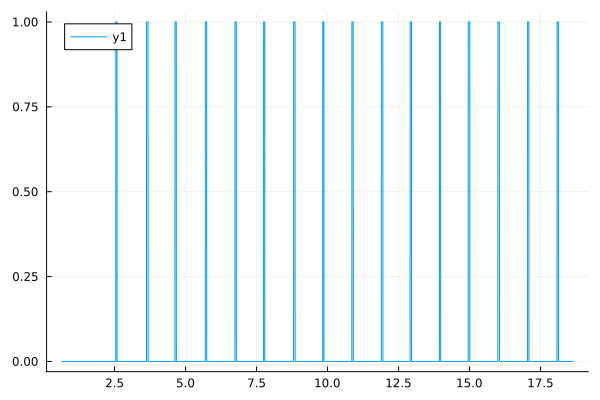

In [10]:
plot(p_time_sys, input)

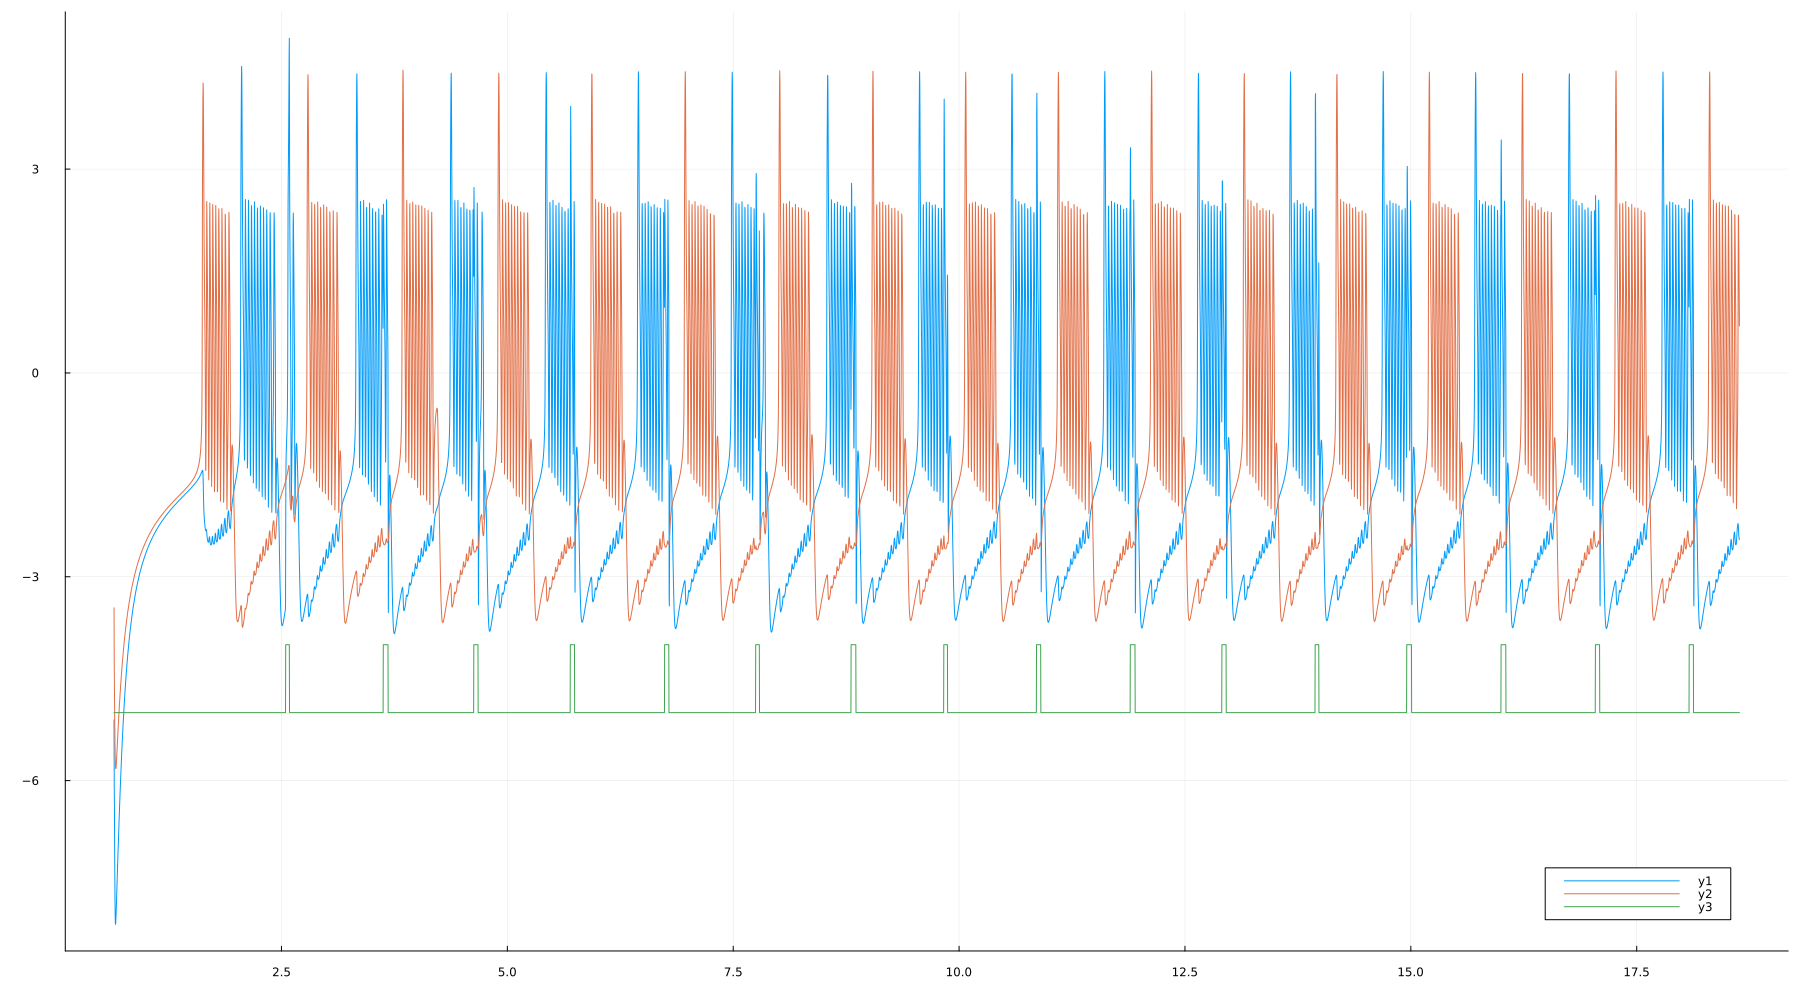

In [5]:
plot(p_time_sys, p_neuron1)
plot!(p_time_sys, p_neuron2)
plot!(p_time_sys, input .- 5, size=(1800, 1000), bottommargin=20px, leftmargin=20px)

In [9]:
savefig("drum_hit.png")

"c:\\Users\\chris\\OneDrive\\Documents\\Unif\\PhD\\Stay with Fulvio\\Vex Control Code\\C++\\Plot data from SDCard\\drum_hit.png"

In [21]:
mat_sys = creadToArray(string(base_name, "_system.bin"))

p_time_sys = mat_sys[1, :];
p_neuron1 = mat_sys[2, :];
p_neuron2 = mat_sys[3, :];
p_in_neuron1 = mat_sys[4, :];
p_in_neuron2 = mat_sys[5, :];

In [161]:
l = @layout [
    Plots.grid(3,3)
]

p1 = plot(p_time_sys, p_out, ylabel="out", legend=false)
p2 = plot(p_time_sys, p_angle_filt, ylabel="angle", legend=false)
p3 = plot(p_time_sys, p_speed_filt, ylabel="speed", legend=false)
p4 = plot(p_time_sys, p_neuron1, ylabel="neuron1", legend=false)
p5 = plot(p_time_sys, p_neuron2, ylabel="neuron2", legend=false)
p6 = plot(p_time_sys, p_in_neuron1, ylabel="neuron1 input", legend=false)
p7 = plot(p_time_sys, p_in_neuron2, ylabel="neuron2 input", legend=false)

plot(p1, p2, p3, p4, p5, p6, p7, layout=l, size=(1800, 1000), bottommargin=20px, leftmargin=20px)

LoadError: UndefVarError: p_out not defined

In [22]:
T_lim = 10.0 .+ max(p_time_sen[1], p_time_sys[1])

ind_good_sen = p_time_sen .> T_lim;
T_theta = p_time_sen[ind_good_sen];
theta = p_angle[ind_good_sen];
theta_dot = movingaverage(p_speed, 50)[ind_good_sen];
ind_good_sys = p_time_sys .> T_lim;
T_V = p_time_sys[ind_good_sys];
V_push = p_neuron1[ind_good_sys];
V_pull = p_neuron2[ind_good_sys];

In [18]:
T_lim = 10.0
ind_good_sen = p_time_sen .> T_lim;
T_theta = p_time_sen[ind_good_sen];
theta = p_angle[ind_good_sen];
theta_dot = movingaverage(p_speed, 50)[ind_good_sen];

In [221]:
ind_good_sen = p_time_sen .> T_lim;
T_theta = p_time_sen[ind_good_sen];
theta = movingaverage(p_voltage, 25)[ind_good_sen];
theta_dot = movingaverage(p_speed_sensor, 25)[ind_good_sen];

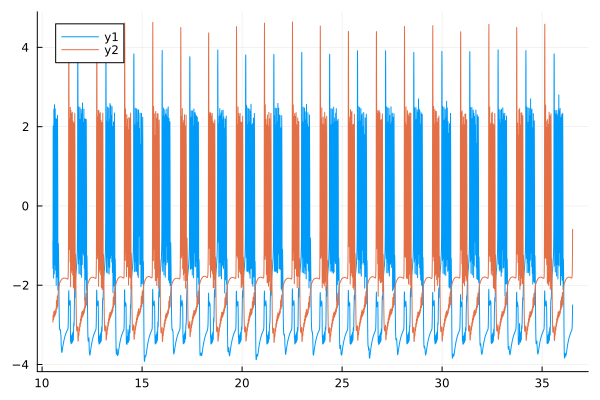

In [18]:
plot(T_V, V_push)
plot!(T_V, V_pull)

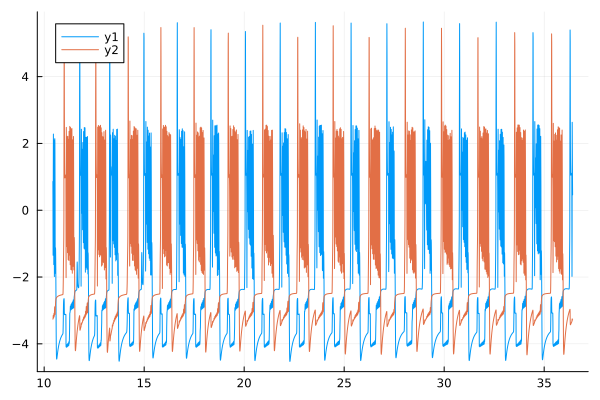

In [25]:
plot(T_V, V_push)
plot!(T_V, V_pull)

In [24]:
a = burst_analysis(T_V, V_pull)
time, lengths, avg, freq = a

([12.566476258920826, 14.187547719313025, 15.8216255914535, 17.48232084920947, 19.187802483534117, 20.91601643716897, 22.662338000200894, 24.43644079758073, 26.23232868034364, 28.042355397075664, 29.851806326578586, 31.672948567884657, 33.512197003561404], [0.5207004203057917, 0.5081135293537695, 0.511702154104384, 0.5206159696292936, 0.5160031824976059, 0.5098256825694385, 0.5225952118492181, 0.5487315630636367, 0.5525393046328446, 0.5193701134910036, 0.5493259065950475, 0.5513126271308302, 0.560101445474281], 0.5300720854382419, 0.5704077831435553, [0.5207004203057917, 0.5081135293537695, 0.511702154104384, 0.5206159696292936, 0.5160031824976059, 0.5098256825694385, 0.5225952118492181, 0.5487315630636367, 0.5525393046328446, 0.5193701134910036, 0.5493259065950475, 0.5513126271308302, 0.560101445474281])

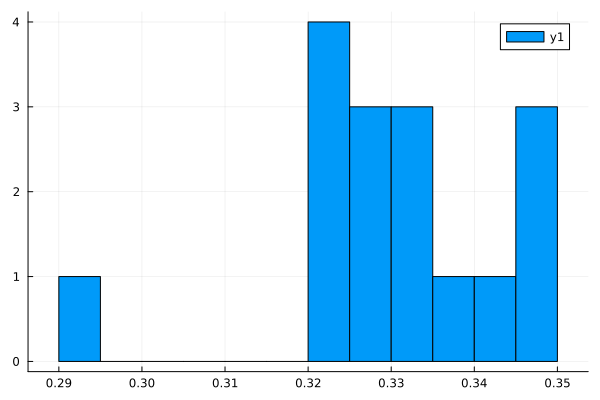

In [15]:
histogram(lengths, nbins=20)#, xlims=(0, 0.001))

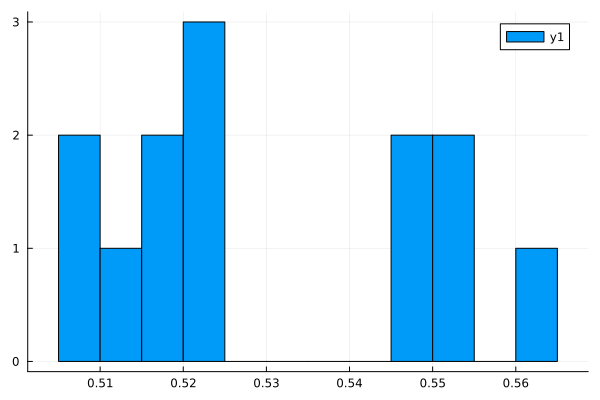

In [26]:
histogram(lengths, nbins=20)#, xlims=(0, 0.001))

In [27]:
a = burst_analysis(T_V, V_push)
time, lengths, avg, freq = a

([11.764704336281541, 13.262591395373342, 14.972776458700043, 16.641040281400862, 18.323348752314423, 20.047746156051943, 21.787043375278547, 23.544517639529637, 25.33144045256928, 27.121419000734846, 28.9408729293501, 30.757329347614093, 32.58656198257558, 34.427222446413815], [0.4136047142165875, 0.4106652116312066, 0.3863868441468892, 0.39386849749773845, 0.4142946421564062, 0.4190855130477331, 0.42694884275635303, 0.4123093924766721, 0.4206481642528921, 0.3824327620343766, 0.38654629712369015, 0.42120837543521006, 0.41245782233760053, 0.41178226030039156], 0.4080170956724105, 0.5710265484971008, [0.4136047142165875, 0.4106652116312066, 0.3863868441468892, 0.39386849749773845, 0.4142946421564062, 0.4190855130477331, 0.42694884275635303, 0.4123093924766721, 0.4206481642528921, 0.3824327620343766, 0.38654629712369015, 0.42120837543521006, 0.41245782233760053, 0.41178226030039156])

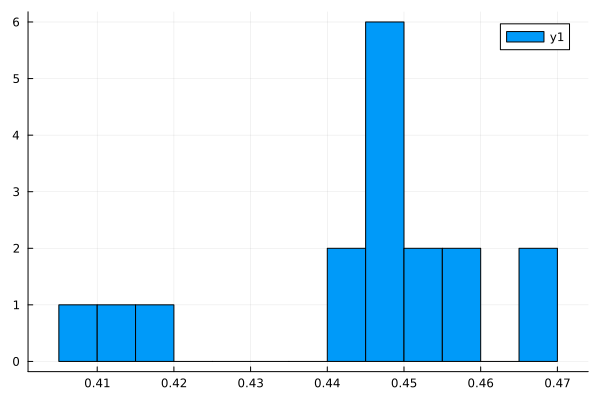

In [17]:
histogram(lengths, nbins=20)

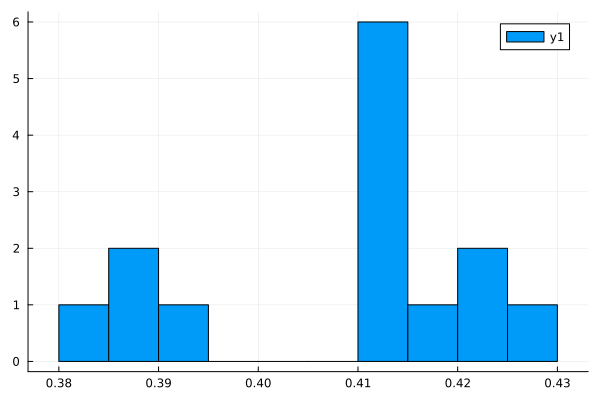

In [28]:
histogram(lengths, nbins=20)#, xlims=(0, 0.001))

In [127]:
up, down = computeCrossings(T_theta, theta_dot)

([11.13818276979742, 12.11669473699422, 13.092948003824093, 14.072285857142857, 15.047743937823833, 16.017145564971752, 16.93716701214575, 17.880783899313503, 18.882609761904764, 19.8823384164859  …  27.70022794091904, 28.630480444020357, 29.58287876525821, 30.564396755060727, 31.541491679211468, 32.52440815384615, 33.49194057231726, 34.490169774390246, 35.47624496475771, 36.44042719543291], [10.710600274725275, 11.690880313090418, 12.677116858037579, 13.632434560747662, 14.61058282781457, 15.589693484162895, 16.519488339960237, 17.448684238178632, 18.449924673748104, 19.448657163132136  …  27.261785233333327, 28.225897590443683, 29.1544314735376, 30.127136258992802, 31.115451070444106, 32.10171970016207, 33.064143478991596, 34.05868177620396, 35.033275285714275, 36.01747])

In [126]:
amp, timing, mean_amp, mean_p = oscillation_analysis(T_theta, theta, theta_dot)

(Union{Missing, Float64}[1.0826351011513575, -0.2841322360854018, 0.9077531101015258, -0.25184364492350664, 0.8203121145766099, -0.3286381320112572, 0.9246828038458709, -0.3270673356844622, 1.0627383476786223, -0.2059414855960558  …  0.7728391589223642, -0.30106192982974683, 1.0335913491703168, -0.29949113350295187, 1.0211995114811572, -0.33474678439323735, 0.8679596031560551, -0.2734857276482363, 0.929220659901056, -0.2748819910498318], Union{Missing, Float64}[10.710600274725275, 11.13818276979742, 11.690880313090418, 12.11669473699422, 12.677116858037579, 13.092948003824093, 13.632434560747662, 14.072285857142857, 14.61058282781457, 15.047743937823833  …  32.10171970016207, 32.52440815384615, 33.064143478991596, 33.49194057231726, 34.05868177620396, 34.490169774390246, 35.033275285714275, 35.47624496475771, 36.01747, 36.44042719543291], 0.6002171006298568, 0.4854684324661818)

In [29]:

ind = lastindex(T_theta[T_theta.<timing[1]])

78

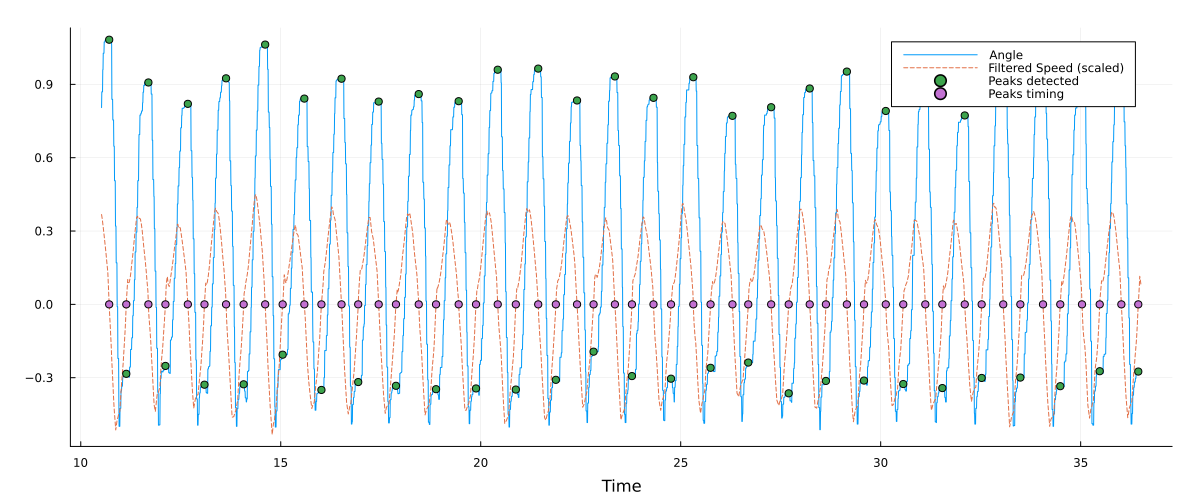

In [129]:
plot(T_theta, theta, size=(1200, 500), label="Angle", xlabel="Time", margin=20px)
plot!(T_theta, theta_dot.*0.1, size=(1200, 500), label="Filtered Speed (scaled)", linestyle=:dash)
scatter!(timing, amp, label="Peaks detected")
scatter!(timing, timing*0, label="Peaks timing")

In [80]:
savefig("angle_analysis.png")

"c:\\Users\\chris\\OneDrive\\Documents\\Unif\\PhD\\Stay with Fulvio\\Vex Control Code\\C++\\Plot data from SDCard\\angle_analysis.png"

In [169]:
times, len, _, _ = burst_analysis(T_V, V_pull)

([13.322454203637184, 17.382846023934444, 21.669473812045368, 25.480325254688548, 29.321574659031164, 33.22256053277345], [2.395089548805947, 0.6392031863074159, 0.6547316512194321, 0.6333832526414227, 0.6521168861411226, 0.6522785832932598], 0.9378005180681, 0.26749385535243286)

In [ ]:
plot(p_time_sen .- p_time_sen[1], p_angle, ylabel="angle [rad]", xlabel="time [s]", size=(1200, 500), margin=20px, xlims=(10, Inf))

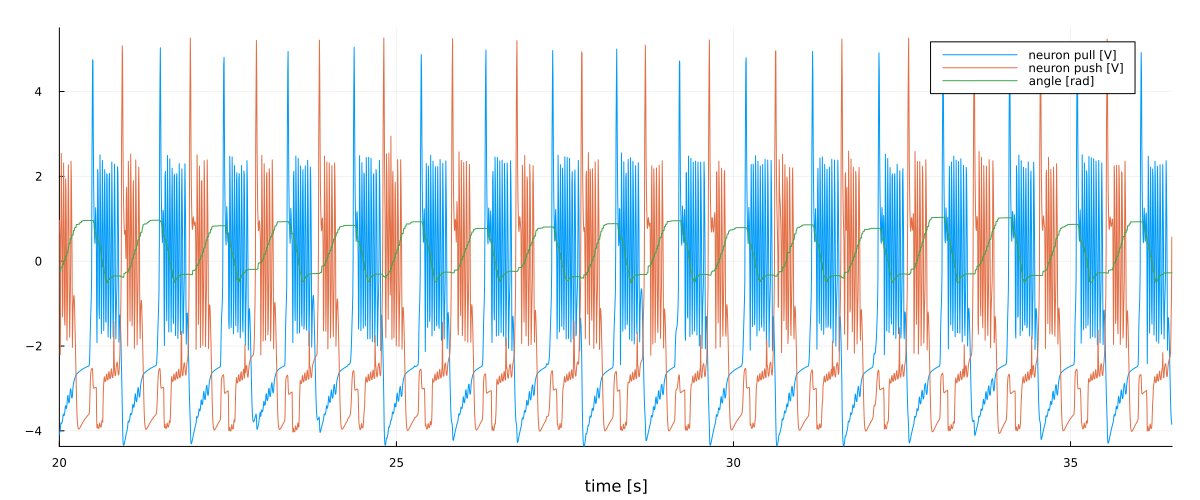

In [125]:
plot(T_V, V_pull, xlabel="time [s]", size=(1200, 500), margin=20px, xlims=(20, Inf), label="neuron pull [V]", ylims=(-Inf, 5.5))
plot!(T_V, V_push, label="neuron push [V]")
plot!(T_theta, theta, label="angle [rad]")

In [111]:
savefig("too_large_gsm.png")

"c:\\Users\\chris\\OneDrive\\Documents\\Unif\\PhD\\Stay with Fulvio\\Vex Control Code\\C++\\Plot data from SDCard\\too_large_gsm.png"

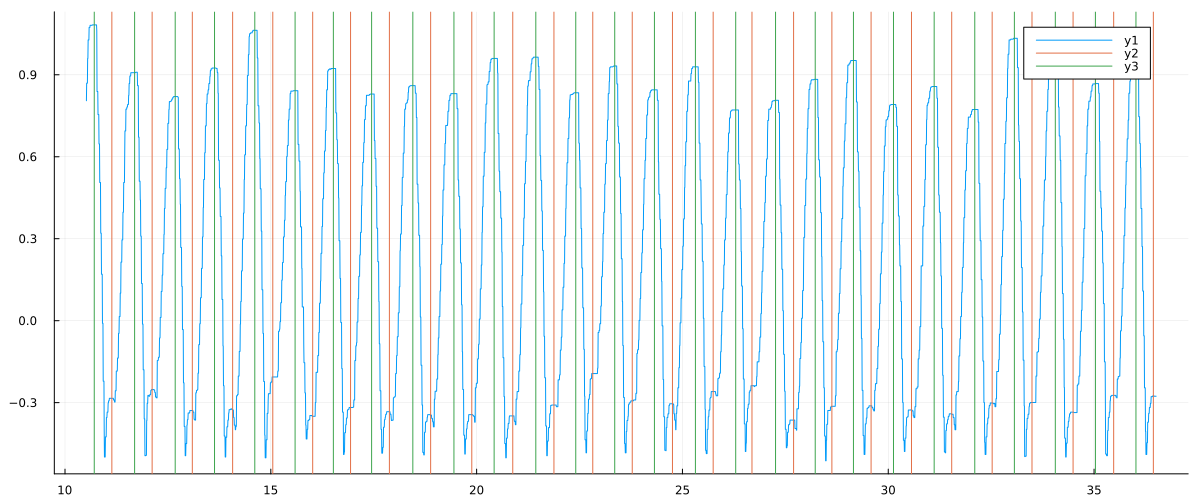

In [128]:
plot(T_theta, theta, size=(1200,500))
vline!(up)
vline!(down)

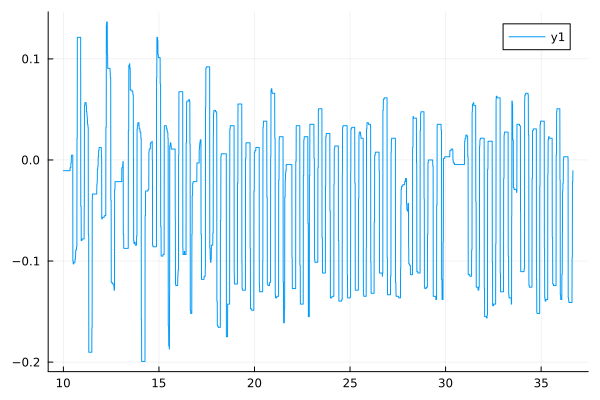

In [166]:
plot(T_theta, theta)

In [178]:
a = oscillation_burst_analysis(T_V, V_push, V_pull, T_theta, theta, theta_dot)

((0.4099244505706609, 0.5314122764412019), (0.5493034455225699, 0.5522497800984076), ([0.30011356023869623, 0.2838544926551289, 0.26359974939962494, 0.26396493172684965, 0.2766885340339874, 0.2874352001244543, 0.2724129230404614, 0.25582312062759266, 0.25481020220778106, 0.25004765046275823, 0.24725381549317424, 0.26499276988113535, 0.0], [0.3869272494833214, 0.4050797334493502, 0.3500927071320887, 0.3620656951770465, 0.3483048671867495, 0.3397857295089689, 0.33943404495222285, 0.3359672982144091, 0.3332395387868319, 0.30793950672643344, 0.32722798200560593, 0.3449138993710212, 0.0]), 0.012009227586207242, 0.9040803920014817)

In [ ]:
histogram(timer_inter, xlims=(0,0.001))

In [ ]:
max_speed = (200*2*pi)/60 
p_speed_rad = max_speed.*p_speed./100
p_speed_rad_filt = max_speed.*p_speed_filt./100

"""
p_time_sen = df_sensors[!, "1"][:];
p_angle = df_sensors[!, "2"][:];
p_speed = df_sensors[!, "3"][:];
p_torque = df_sensors[!, "4"][:];
p_voltage = df_sensors[!, "5"][:];
p_current = df_sensors[!, "6"][:];
p_power = df_sensors[!, "7"][:];
p_volt_sent = df_sensors[!, "7"][:];
""";

In [2]:
mul = (200*2*pi)/6000 

0.20943951023931956

In [3]:
1/mul

4.77464829275686

In [ ]:
plot(p_time_sen, p_speed_rad, ylabel="Speed", label="Original", linetype=:steppost, size=(1200,600), xlims=(10,15))
plot!(p_time_sys, p_speed_rad_filt, ylabel="Speed", label="Filtered", linetype=:steppost, size=(1200,600), xlims=(10,15))

In [ ]:
torque_power = p_torque.*p_speed_rad;
elec_power = p_voltage.*p_current;

In [ ]:
plot(p_time_sen, torque_power, label="Torque Power", linetype=:steppost, ylabel="Power", size=(1200,600), xlims=(10,15))
plot!(p_time_sen, elec_power, label="Electric Power", linetype=:steppost)

In [ ]:
inputFile = "data\\comp_speed_test_system.bin"
command =`binaryToCSV.exe $inputFile $outputFile`
run(command)

df_time = CSV.read(outputFile, DataFrame);

comp_times = df_time[!, "1"][:];

In [ ]:
median(comp_times)*1e6

In [ ]:
mean(comp_times)*1e6

In [ ]:
std(comp_times)*1e6

In [ ]:
maximum(comp_times)*1e6

In [ ]:
length(comp_times)

In [ ]:
histogram(comp_times*1e6, size=(1000, 600), legend=false, xlabel="Computation Time [µs]", ylabel="Probability", normalize=:probability, bottommargin=20px, leftmargin=20px)

In [ ]:
inputFile = "data\\write_speed_test.bin"
command =`binaryToCSV.exe $inputFile $outputFile`
run(command)

df_write = CSV.read(outputFile, DataFrame);

sizes = df_write[!, "1"][:];
total_times = df_write[!, "2"][:];
write_times = df_write[!, "3"][:];

In [ ]:
plot(sizes, write_times*1e3, legend=false, size=(1000, 600), xlabel="Number of doubles", ylabel="Write Time [ms]", bottommargin=20px, leftmargin=20px)

In [ ]:
plot(sizes, write_times*1e3, legend=false, size=(1000, 600), xlabel="Number of doubles", ylabel="Write Time [ms]", bottommargin=20px, leftmargin=20px, xlims=(1, 1000), ylims=(0, 15))

In [ ]:
rm(outputFile)